<h1><center>Report for Capstone Project</center></h1>

Google Data Analytics Certificate

December, 2022

Contributor: Erfan Salavati


# 1. A clear summary of the business task

The goal of this project, is to analyze the following public dataset <br>
[FitBit Fitness Tracker Data](https://www.kaggle.com/arashnic/fitbit)<br>
and to provide business and marketing recommendations for a chosen company based on the analysis.

The goal of the comapny is to improve its current services and design new services for their customers. They want to do this based on the insights out of the customer usage data in this dataset.

The data is obtained voluntarily from a group of users of a fitness tracker instrument. The instrument records various activity and health related mesures in a live manner.

# 2. A description of all data sources used


## Dataset
The dataset consists of 18 csv files with a total size of 322 MB. The dataset inculdes some processed data but since we will perform a complete data analysis, we don't need the processes files, and we just use the raw data. For this reason we ignore the wide format data and just keep the long format data files. Moreover, some data files are just merge of some other files, and hence we ignore them too. 

All considered files (except the `weightLogInfo_merged`) consist of time series data. The time-frames include daily, hourly, and minutely data. These files record different activities and health measures of the user. The `weightLogInfo_merged` file is a transactional data file that records the measured weight of the user and the measurement time.

## Other sources

I have used an auxiliary public metadata file provided in the following link:<br>
[Fitbit data dictionary](https://www.fitabase.com/media/1930/fitabasedatadictionary102320.pdf)<br>
This files explains in detail the meaning of each column and ints values in the dataset.


# 3. Documentation of any cleaning or manipulation of data




## Reading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_directory = "/content/drive/MyDrive/Documents/Projects/0-Google Data Analytics Certificate/Capstone Project/Data/"

dailyActivity = pd.read_csv(data_directory+"dailyActivity_merged.csv")
heartrate_seconds = pd.read_csv(data_directory+"heartrate_seconds_merged.csv")
minuteCaloriesNarrow = pd.read_csv(data_directory+"minuteCaloriesNarrow_merged.csv")
minuteIntensitiesNarrow = pd.read_csv(data_directory+"minuteIntensitiesNarrow_merged.csv")
minuteMETsNarrow = pd.read_csv(data_directory+"minuteMETsNarrow_merged.csv")
minuteSleep = pd.read_csv(data_directory+"minuteSleep_merged.csv")
minuteStepsNarrow = pd.read_csv(data_directory+"minuteStepsNarrow_merged.csv")
sleepDay = pd.read_csv(data_directory+"sleepDay_merged.csv")
weightLogInfo = pd.read_csv(data_directory+"weightLogInfo_merged.csv")

dailyActivity = dailyActivity.rename(columns={'ActivityDate':'date'})
minuteCaloriesNarrow = minuteCaloriesNarrow.rename(columns={'ActivityMinute':'date_time'})
minuteIntensitiesNarrow = minuteIntensitiesNarrow.rename(columns={'ActivityMinute':'date_time'})
minuteMETsNarrow = minuteMETsNarrow.rename(columns={'ActivityMinute':'date_time'})
minuteSleep = minuteSleep.rename(columns={'ActivityMinute':'date_time'})
minuteStepsNarrow = minuteStepsNarrow.rename(columns={'ActivityMinute':'date_time'})
weightLogInfo = weightLogInfo.rename(columns={'Date':'date_time'})

minute_data = minuteCaloriesNarrow.merge(minuteIntensitiesNarrow,on=["Id","date_time"])
minute_data = minute_data.merge(minuteMETsNarrow,on=["Id","date_time"])
minute_data = minute_data.merge(minuteStepsNarrow,on=["Id","date_time"])

minute_data['date_time'] = pd.to_datetime(minute_data['date_time'], format="%m/%d/%Y %I:%M:%S %p")
dailyActivity['date'] = pd.to_datetime(dailyActivity['date'], format="%m/%d/%Y")
weightLogInfo['date_time'] = pd.to_datetime(minute_data['date_time'], format="%m/%d/%Y %I:%M:%S %p")
minute_data.dtypes
dailyActivity.dtypes
weightLogInfo.dtypes

Id                         int64
date_time         datetime64[ns]
WeightKg                 float64
WeightPounds             float64
Fat                      float64
BMI                      float64
IsManualReport              bool
LogId                      int64
dtype: object

## Merging different dataframes and aggregating timeframes

In [3]:
minute_data['date'] = minute_data['date_time'].dt.date
daily_data = minute_data.groupby(by=['Id','date'], as_index=False).sum()
daily_data['date'] = pd.to_datetime(daily_data['date'])
daily_data = daily_data.merge(dailyActivity, on=["Id", "date"])

minute_data['date_hour'] = minute_data['date_time'].dt.round("H")
hour_data = minute_data.groupby(by=['Id','date_hour'], as_index=False).sum()
hour_data = hour_data.rename(columns={'date_hour':'date_time'})

We decided to use the hourly data from the company.

# 4. A summary of your analysis


The process of our analysis has been summarized as follows:
1. Performing descriptive statistics of each variable in data
2. Performing descriptive statistics of pairs of variables in data
3. Plotting the variables versus time to see the trends
4. Plotting the variables versus weekdays and day-hours to discover periodic behaviour
5. Conducting exploratory analysis in order to extract new features from data 

# 5. Supporting visualizations and key findings


## Statistical Summary of Data

I found that only 8 users have weight data. Therefore the weight data is incomplete and not suitable for our analysis. All the weight measurements has been done at the same time. Hence no useful information regarding the weight change is available.

In [4]:
print("start date of activity data: ",minute_data['date_time'].min())
print("end date of activity data: ",minute_data['date_time'].max())

print("start date of weight data: ",weightLogInfo['date_time'].min())
print("end date of weight data: ",weightLogInfo['date_time'].max())

start date of activity data:  2016-04-12 00:00:00
end date of activity data:  2016-05-12 15:59:00
start date of weight data:  2016-04-12 00:00:00
end date of weight data:  2016-04-12 01:06:00


In [5]:
print("list of users: ", minute_data['Id'].unique())
print("number of users: ", len(minute_data['Id'].unique()))

print("list of users with weight: ", weightLogInfo['Id'].unique())
print("number of users with weight: ", len(weightLogInfo['Id'].unique()))

list of users:  [1503960366 1624580081 1644430081 1844505072 1927972279 2022484408
 2026352035 2320127002 2347167796 2873212765 3372868164 3977333714
 4020332650 4057192912 4319703577 4388161847 4445114986 4558609924
 4702921684 5553957443 5577150313 6117666160 6290855005 6775888955
 6962181067 7007744171 7086361926 8053475328 8253242879 8378563200
 8583815059 8792009665 8877689391]
number of users:  33
list of users with weight:  [1503960366 1927972279 2873212765 4319703577 4558609924 5577150313
 6962181067 8877689391]
number of users with weight:  8


### Analysis of the weight data

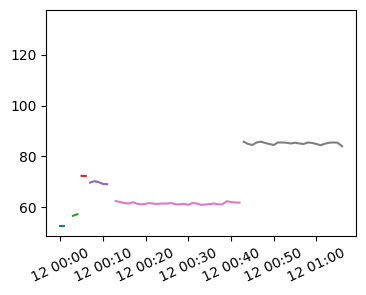

In [6]:
import datetime as DT
import matplotlib.dates as mdates
weight_by_ID = {k:df for k, df in weightLogInfo.groupby('Id')}
fig, ax = plt.subplots(1, 1, figsize=(4, 3), dpi=100)
for k in weight_by_ID:
    ax.plot(weight_by_ID[k].set_index('date_time')['WeightKg'])
ax.xaxis_date()
# xfmt = mdates.DateFormatter('%Y-%m-%d')
# ax.xaxis.set_major_formatter(xfmt)
# dates = [x.to_pydatetime() for x in list(pd.to_datetime(pd.date_range(start='2016-04-12 00:00:00', end='2016-05-12 23:59:59', periods=10)))]
# ax.set_xticks(dates)
plt.xticks(rotation=25)
plt.show()

## Data inconsistencies
I observed some inconsistemcies in the dataset whose origin is not known to me. Indeed when I aggregated minute data to create hourly data, the aggregated data was not completely identical with the hourly data which was provided in the dataset. The differences are in the variables "Steps" and "Calories".<br>
The following plot shows the scatter plot of the differing variables.


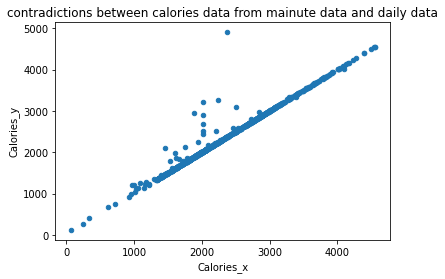

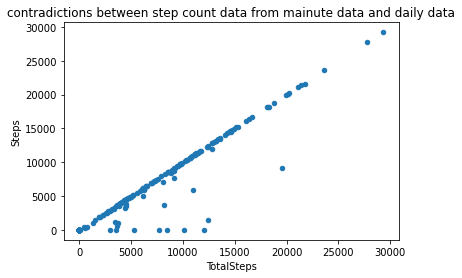

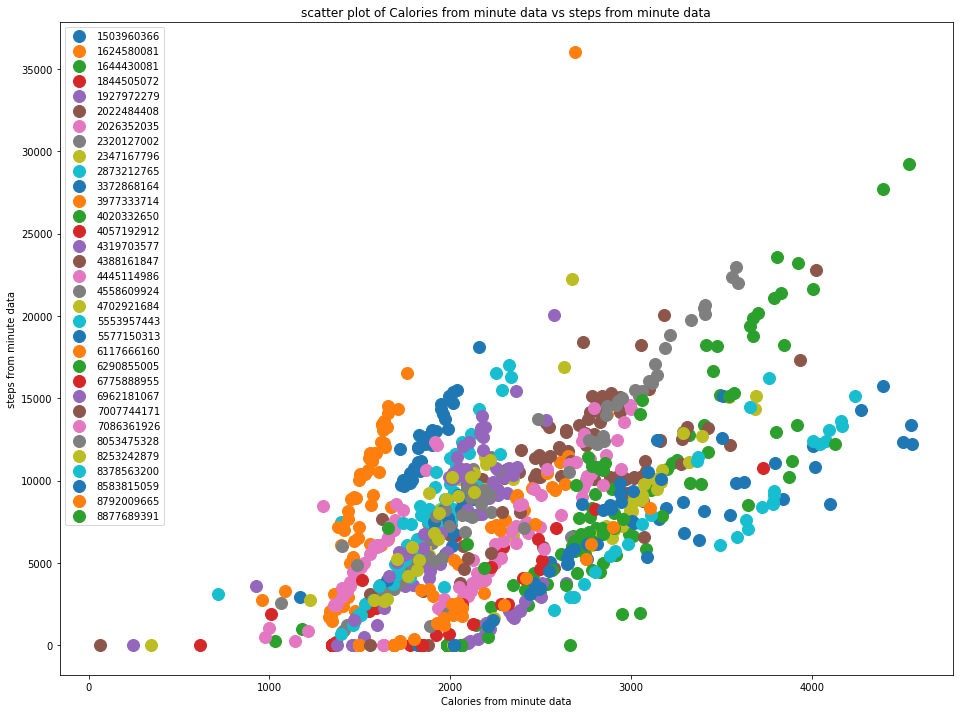

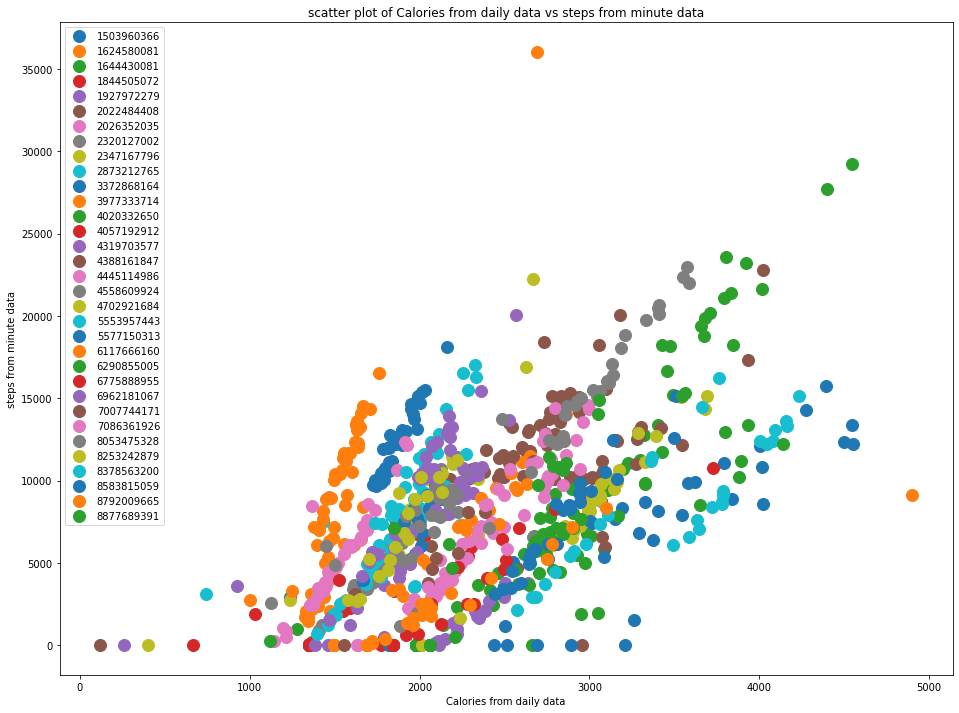

In [7]:
diff = daily_data['Calories_x']/daily_data['Calories_y']-1
daily_data[(diff!=0)][['Calories_x','Calories_y']].plot.scatter(x='Calories_x',y='Calories_y',title='contradictions between calories data from mainute data and daily data')

diff = daily_data['TotalSteps']/daily_data['Steps']-1
daily_data[(diff!=0)][['TotalSteps','Steps']].plot.scatter(x='TotalSteps',y='Steps',title='contradictions between step count data from mainute data and daily data')

fig, ax = plt.subplots(figsize=(16,12))
groups = daily_data.groupby('Id')
for name, group in groups:
    ax.plot(group.Calories_x, group.Steps, marker='o', linestyle='', markersize=12, label=name)
ax.set_title('scatter plot of Calories from minute data vs steps from minute data')
ax.set_xlabel('Calories from minute data')
ax.set_ylabel('steps from minute data')
plt.legend()

fig, ax = plt.subplots(figsize=(16,12))
groups = daily_data.groupby('Id')
for name, group in groups:
    ax.plot(group.Calories_y, group.Steps, marker='o', linestyle='', markersize=12, label=name)
ax.set_title('scatter plot of Calories from daily data vs steps from minute data')
ax.set_xlabel('Calories from daily data')
ax.set_ylabel('steps from minute data')
plt.legend()


The second scatter plot shows an outlier point which is not present in the first plot. It probably indicates an incorrect data which may be due to human error or device error. Since this data point has x-values larger than usual I concluded that the Calories from daily data are not reliable, and hence I decided to ignore them and to work with calories from minute data. I did the same for the Steps variable.

In [8]:
daily_data = daily_data.drop(columns=['Calories_y','TotalSteps']).rename(columns={'Calories_x':'Calories'})

# Analysis of daily activity data

The following plot shows the line plot of the steps taken by each user

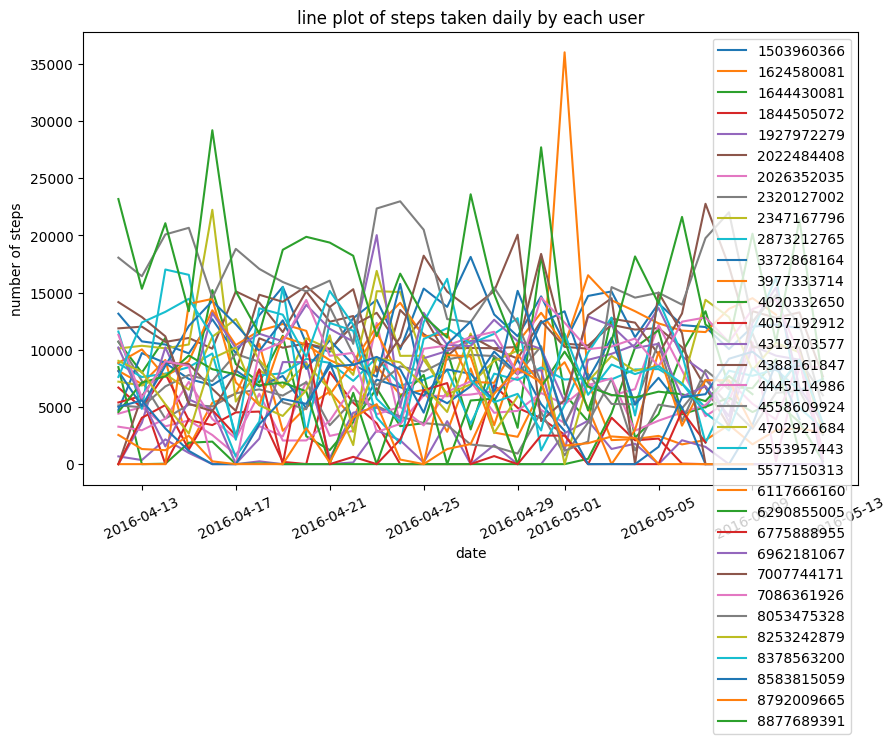

In [18]:
import datetime as DT
import matplotlib.dates as mdates
daily_by_ID = {k:df for k, df in daily_data.groupby('Id')}
fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=100)
for id in daily_by_ID:
    ax.plot(daily_by_ID[id].set_index('date')['Steps'],label=id)
ax.xaxis_date()
plt.xticks(rotation=25)
ax.set_title('line plot of steps taken daily by each user')
ax.set_xlabel('date')
ax.set_ylabel('number of steps')
plt.legend()
plt.show()

The following plot is the splitted version of the previous plot, which for each user shows the activity profile of they in the one-month study period.

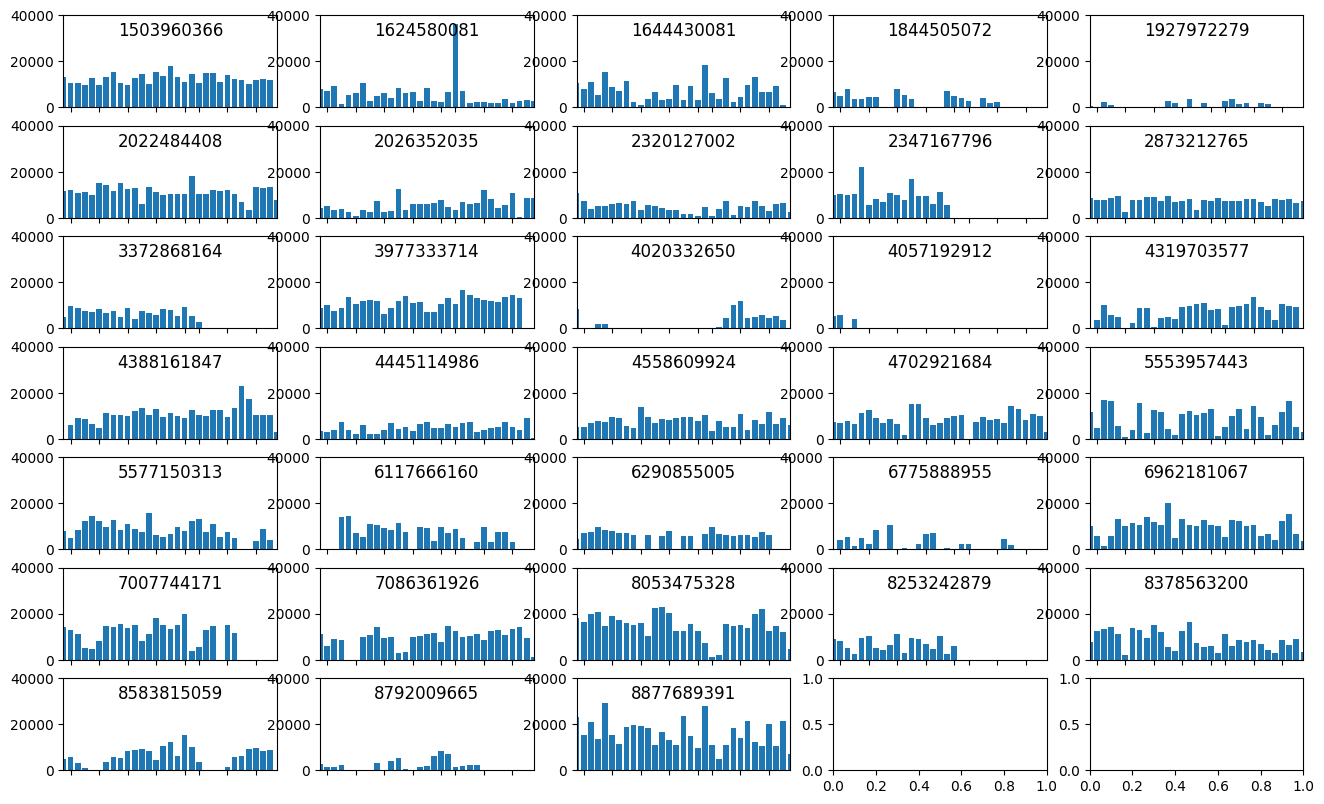

In [41]:
import datetime as DT
import matplotlib.dates as mdates
daily_by_ID = {k:df for k, df in daily_data.groupby('Id')}
fig, axes = plt.subplots(7, 5, figsize=(16, 10), dpi=100)
n=0
for id in daily_by_ID:
    ax = axes[n//5,n%5]
    # ax.plot(daily_by_ID[id].set_index('date')['Steps'],label=id)
    ax.bar(x = daily_by_ID[id]['date'], height=daily_by_ID[id]['Steps'],label=id)
    ax.xaxis_date()
    ax.set_xlim(pd.to_datetime("2016-04-12 00:00:00"),pd.to_datetime("2016-05-12 00:00:00"))
    ax.set_ylim(0,40000)
    # plt.xticks(rotation=25)
    ax.tick_params(labelbottom=False) 
    ax.set_title(str(id),pad=-15)
    n+=1
# ax.set_xlabel('date')
# ax.set_ylabel('number of steps')
# plt.legend()
plt.show()


# Day-Hour Analysis of Activity

The following plot shows the intraday activity profile of each user in terms of steps taken. As can be seen in the plots, there are two picks in their activity during the day. One is around 9 AM and the other is around 7 PM.

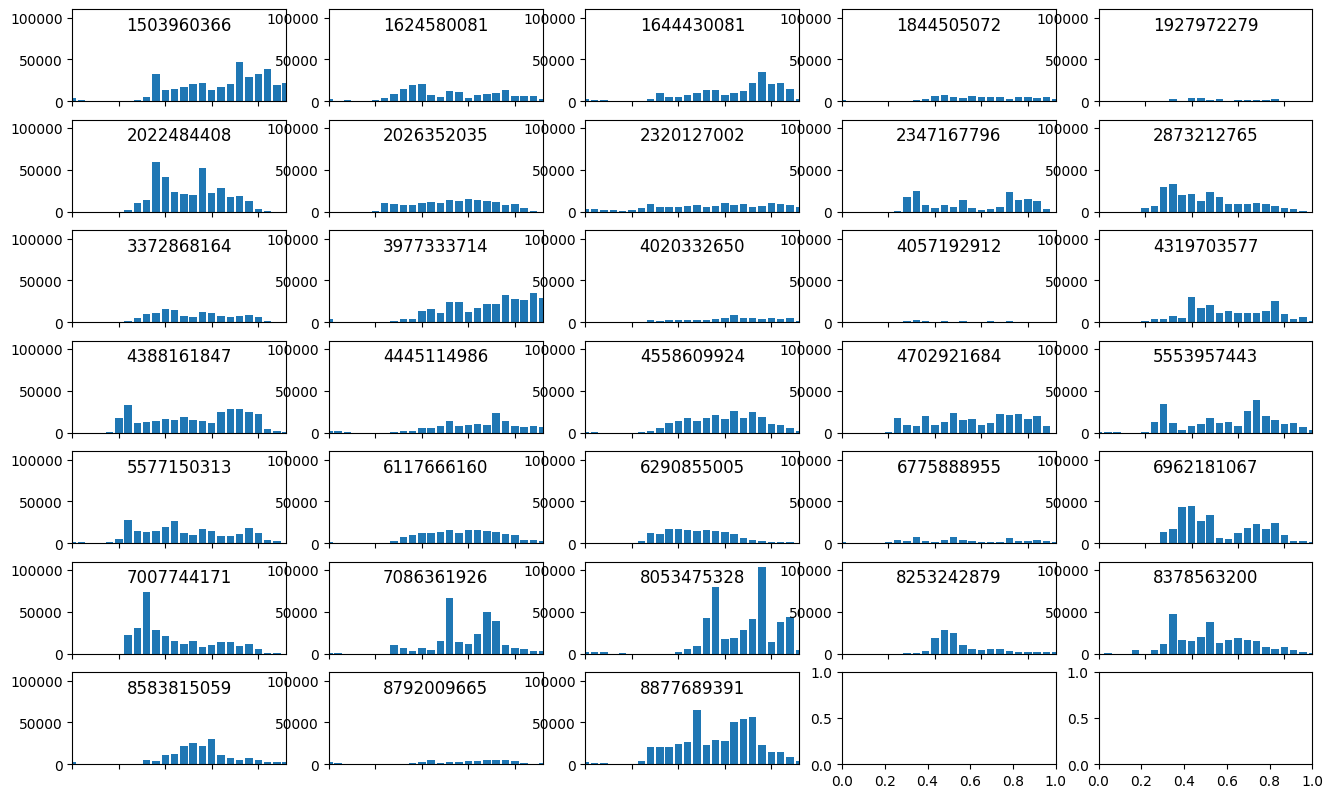

In [78]:
minute_data['hour'] = minute_data['date_time'].dt.hour
day_hour_agg = minute_data[['hour','Id','Calories','METs','Steps']].groupby(['Id','hour']).sum().reset_index()
day_hour_agg_by_ID = {k:df for k, df in day_hour_agg.groupby('Id')}
fig, axes = plt.subplots(7, 5, figsize=(16, 10), dpi=100)
n=0
for id in day_hour_agg_by_ID:
    ax = axes[n//5,n%5]
    # ax.plot(daily_by_ID[id].set_index('date')['Steps'],label=id)
    ax.bar(x = day_hour_agg_by_ID[id]['hour'], height=day_hour_agg_by_ID[id]['Steps'],label=id)
    ax.set_xlim(0,23)
    ax.set_ylim(0,110_000)
    # plt.xticks(rotation=25)
    ax.tick_params(labelbottom=False) 
    ax.set_title(str(id),pad=-15)
    n+=1
# ax.set_xlabel('date')
# ax.set_ylabel('number of steps')
# plt.legend()
plt.show()

The following plot has an additional axis on the right which indicates the level of calories burned for each user, shown by red bars. As can be seen in the plots, even intense activity can increase calory burn by up to at most 100 percent.

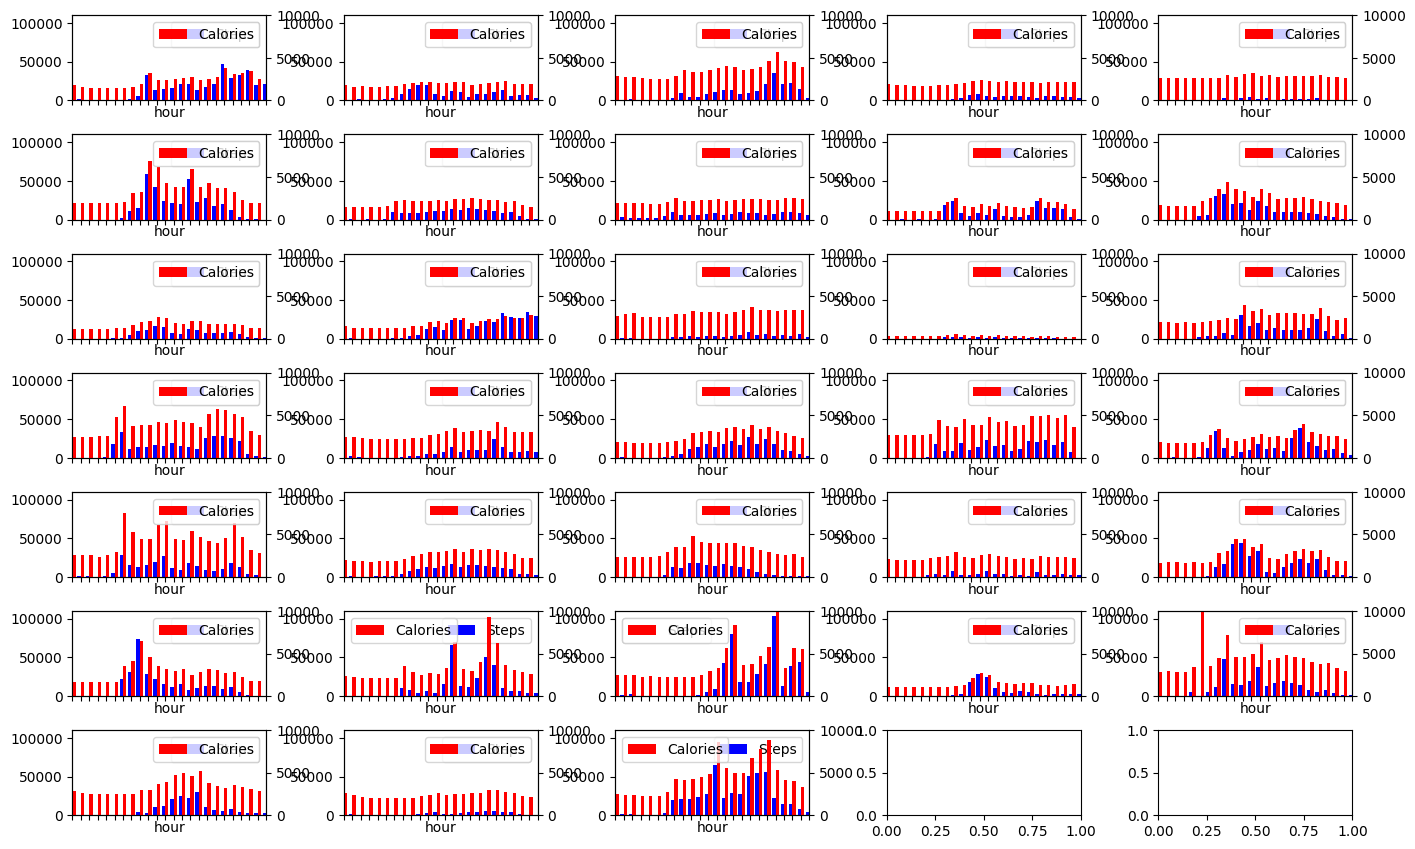

In [84]:
minute_data['hour'] = minute_data['date_time'].dt.hour
day_hour_agg = minute_data[['hour','Id','Calories','METs','Steps']].groupby(['Id','hour']).sum().reset_index()
day_hour_agg_by_ID = {k:df for k, df in day_hour_agg.groupby('Id')}
fig, axes = plt.subplots(7, 5, figsize=(16, 10), dpi=100)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
n=0
width = 0.4
for id in day_hour_agg_by_ID:
    ax = axes[n//5,n%5]
    ax2 = ax.twinx()
    day_hour_agg_by_ID[id][['hour','Steps']].plot(x='hour', kind='bar', color='blue', stacked=False, ax=ax, width=width, position=1)
    day_hour_agg_by_ID[id][['hour','Calories']].plot(x='hour', kind='bar', color='red', stacked=False, ax=ax2, width=width, position=0)
    ax.set_xlim(0,23)
    ax.set_ylim(0,110_000)
    ax2.set_ylim(0,10_000)
    # plt.xticks(rotation=25)
    ax.tick_params(labelbottom=False) 
    # ax.set_title(str(id),pad=-15)
    n+=1
# ax.set_xlabel('date')
# ax.set_ylabel('number of steps')
# plt.legend()
plt.show()

# 6. Your top high-level content recommendations based on your analysis

The following recommendations are supported by my analysis:


1.   Since the tracking instrument is recording the intensity of the activity by minute resolution, It can somehow determine the pattern of the activity (and even the kind of activity). This can have two applications. One is the identify and record the kind of activity. The other is to provide the user with health tips regarding the exercise and safety issues.
2. To be continued   

